In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
data = pd.read_csv("./stocks_data/AAPL_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume,EMA_12,EMA_26,MACD,Signal,RSI,CCI,ADX
0,2015-03-02 00:00:00-05:00,28.865108,29.095135,28.652947,28.829374,192386800,28.829374,28.829374,0.000000,0.000000,45.526105,56.240216,28.673114
1,2015-03-03 00:00:00-05:00,28.800338,28.925401,28.606040,28.889668,151265200,28.838650,28.833840,0.004810,0.000962,45.526105,56.240216,28.673114
2,2015-03-04 00:00:00-05:00,28.831606,28.934334,28.657410,28.706539,126665200,28.818325,28.824411,-0.006085,-0.000448,45.526105,56.240216,28.673114
3,2015-03-05 00:00:00-05:00,28.715477,28.753442,28.085693,28.230856,226068400,28.727945,28.780444,-0.052498,-0.010858,45.526105,56.240216,28.673114
4,2015-03-06 00:00:00-05:00,28.675274,28.891902,28.197354,28.273285,291368400,28.657998,28.742876,-0.084879,-0.025662,45.526105,56.240216,28.673114


In [ ]:
len(data), data.shape

(2515, (2515, 13))

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'EMA_12', 'EMA_26',
       'MACD', 'Signal', 'RSI', 'CCI', 'ADX'],
      dtype='object')

In [ ]:
data = data.set_index("Date")

In [ ]:
data.tail()

,Open,High,Low,Close,Volume,EMA_12,EMA_26,MACD,Signal,RSI,CCI,ADX
Date,,,,,,,,,,,,
2025-02-21 00:00:00-05:00,245.949997,248.690002,245.220001,245.550003,53197400,240.208448,237.920002,2.288446,0.363129,62.766179,103.163767,31.180457
2025-02-24 00:00:00-05:00,244.929993,248.860001,244.419998,247.100006,51326400,241.268688,238.600002,2.668686,0.824240,80.231290,90.587796,28.337470
2025-02-25 00:00:00-05:00,248.000000,250.000000,244.910004,247.039993,48013300,242.156581,239.225187,2.931394,1.245671,76.585168,83.906297,24.582475
2025-02-26 00:00:00-05:00,244.330002,244.979996,239.130005,240.360001,44433600,241.880184,239.309247,2.570937,1.510724,62.116289,19.244203,21.212065
2025-02-27 00:00:00-05:00,239.410004,242.460007,237.059998,237.300003,41078200,241.175541,239.160414,2.015127,1.611605,56.035173,-15.982410,18.992802


In [ ]:
# normalizing data
data = data.values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0]

array([0.03484219, 0.03398254, 0.03452298, 0.03425526, 0.2703879 ,
       0.03184143, 0.03052919, 0.42180037, 0.40620287, 0.45542002,
       0.59169241, 0.3071847 ])

In [ ]:
# preparing dataset for LSTM

sequence_len = 30   #considering 30 days window
xs = []
ys = []

for i in range(len(data_scaled) - sequence_len):
    xs.append(data_scaled[i:i+sequence_len])
    ys.append(data_scaled[i+sequence_len])

x = torch.tensor(xs).type(torch.float32)
y = torch.tensor(ys).type(torch.float32)
x[0], y[0]

C:\conda_tmp\ipykernel_1912\1879639991.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  x = torch.tensor(xs).type(torch.float32)


(tensor([[0.0348, 0.0340, 0.0345, 0.0343, 0.2704, 0.0318, 0.0305, 0.4218, 0.4062,
          0.4554, 0.5917, 0.3072],
         [0.0346, 0.0333, 0.0343, 0.0345, 0.2047, 0.0319, 0.0305, 0.4221, 0.4063,
          0.4554, 0.5917, 0.3072],
         [0.0347, 0.0333, 0.0345, 0.0337, 0.1653, 0.0318, 0.0305, 0.4214, 0.4062,
          0.4554, 0.5917, 0.3072],
         [0.0342, 0.0326, 0.0321, 0.0317, 0.3242, 0.0314, 0.0303, 0.4184, 0.4054,
          0.4554, 0.5917, 0.3072],
         [0.0340, 0.0331, 0.0326, 0.0319, 0.4286, 0.0311, 0.0301, 0.4163, 0.4044,
          0.4554, 0.5917, 0.3072],
         [0.0336, 0.0333, 0.0315, 0.0324, 0.5289, 0.0309, 0.0300, 0.4153, 0.4033,
          0.4554, 0.5917, 0.3072],
         [0.0322, 0.0311, 0.0303, 0.0300, 0.4031, 0.0304, 0.0297, 0.4116, 0.4016,
          0.4554, 0.5917, 0.3072],
         [0.0306, 0.0288, 0.0287, 0.0278, 0.4037, 0.0296, 0.0293, 0.4062, 0.3991,
          0.4554, 0.5917, 0.3072],
         [0.0283, 0.0290, 0.0282, 0.0299, 0.2721, 0.0292, 0.0290

In [ ]:
x.shape, y.shape

(torch.Size([2485, 30, 12]), torch.Size([2485, 12]))

In [ ]:
# dividing data into train and test set
split_ratio = 0.8
split_size = int(len(x) * split_ratio)
print(split_size)

X_train = x[:split_size]
X_test = x[split_size:]
y_train = y[:split_size]
y_test = y[split_size:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

1988
torch.Size([1988, 30, 12]) torch.Size([497, 30, 12]) torch.Size([1988, 12]) torch.Size([497, 12])


In [ ]:
X_train[0], y_train[0]

(tensor([[0.0348, 0.0340, 0.0345, 0.0343, 0.2704, 0.0318, 0.0305, 0.4218, 0.4062,
          0.4554, 0.5917, 0.3072],
         [0.0346, 0.0333, 0.0343, 0.0345, 0.2047, 0.0319, 0.0305, 0.4221, 0.4063,
          0.4554, 0.5917, 0.3072],
         [0.0347, 0.0333, 0.0345, 0.0337, 0.1653, 0.0318, 0.0305, 0.4214, 0.4062,
          0.4554, 0.5917, 0.3072],
         [0.0342, 0.0326, 0.0321, 0.0317, 0.3242, 0.0314, 0.0303, 0.4184, 0.4054,
          0.4554, 0.5917, 0.3072],
         [0.0340, 0.0331, 0.0326, 0.0319, 0.4286, 0.0311, 0.0301, 0.4163, 0.4044,
          0.4554, 0.5917, 0.3072],
         [0.0336, 0.0333, 0.0315, 0.0324, 0.5289, 0.0309, 0.0300, 0.4153, 0.4033,
          0.4554, 0.5917, 0.3072],
         [0.0322, 0.0311, 0.0303, 0.0300, 0.4031, 0.0304, 0.0297, 0.4116, 0.4016,
          0.4554, 0.5917, 0.3072],
         [0.0306, 0.0288, 0.0287, 0.0278, 0.4037, 0.0296, 0.0293, 0.4062, 0.3991,
          0.4554, 0.5917, 0.3072],
         [0.0283, 0.0290, 0.0282, 0.0299, 0.2721, 0.0292, 0.0290

In [ ]:
### build LSTM model

class LSTMv0(nn.Module):
    def __init__(self, input_features, hidden_features, num_layers, output_features):
        super().__init__()
        self.hidden_features = hidden_features
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_features, hidden_features, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_features, output_features)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_features)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_features)

        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out)
        return out[:, -1, :]

In [ ]:
# parameters
INPUT_FEATURES = len(X_train[0, 0, :])
HIDDEN_FEATURES = 30
NUM_LAYERS = 3
OUTPUT_FEATURES = len(y_train[0, :])

model_0 = LSTMv0(INPUT_FEATURES, HIDDEN_FEATURES, NUM_LAYERS, OUTPUT_FEATURES)

In [ ]:
model_0

LSTMv0(
  (lstm): LSTM(12, 30, num_layers=3, batch_first=True)
  (fc): Linear(in_features=30, out_features=12, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
# training loop
epochs = 200

for epoch in range(epochs):
    # train mode
    model_0.train()

    # forward pass
    y_pred = model_0(X_train)

    # calulate loss
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # backward
    loss.backward()

    # step optimizer
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # print
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

Epoch: 0 | Loss: 0.1438 | Test Loss: 0.3873
Epoch: 20 | Loss: 0.1343 | Test Loss: 0.3722
Epoch: 40 | Loss: 0.1255 | Test Loss: 0.3583
Epoch: 60 | Loss: 0.1176 | Test Loss: 0.3453
Epoch: 80 | Loss: 0.1102 | Test Loss: 0.3332
Epoch: 100 | Loss: 0.1036 | Test Loss: 0.3219
Epoch: 120 | Loss: 0.0974 | Test Loss: 0.3113
Epoch: 140 | Loss: 0.0918 | Test Loss: 0.3014
Epoch: 160 | Loss: 0.0867 | Test Loss: 0.2922
Epoch: 180 | Loss: 0.0819 | Test Loss: 0.2836


In [ ]:
# evaluate model with test values
model_0.eval()
with torch.inference_mode():
    eval_pred = model_0(X_test)
eval_pred[:5]

tensor([[ 0.1817,  0.0841,  0.0656,  0.0115,  0.0249,  0.1987, -0.0058,  0.1386,
          0.2414,  0.3063,  0.2020,  0.0855],
        [ 0.1817,  0.0841,  0.0656,  0.0114,  0.0248,  0.1989, -0.0059,  0.1386,
          0.2412,  0.3063,  0.2020,  0.0854],
        [ 0.1817,  0.0840,  0.0657,  0.0113,  0.0247,  0.1991, -0.0059,  0.1386,
          0.2412,  0.3063,  0.2020,  0.0853],
        [ 0.1818,  0.0840,  0.0657,  0.0112,  0.0247,  0.1992, -0.0060,  0.1386,
          0.2412,  0.3062,  0.2020,  0.0853],
        [ 0.1818,  0.0840,  0.0656,  0.0112,  0.0247,  0.1993, -0.0060,  0.1386,
          0.2412,  0.3063,  0.2020,  0.0853]])

In [ ]:
eval_pred[-5: ]

tensor([[ 0.1838,  0.0838,  0.0634,  0.0108,  0.0244,  0.2005, -0.0067,  0.1374,
          0.2425,  0.3060,  0.2017,  0.0864],
        [ 0.1839,  0.0837,  0.0633,  0.0108,  0.0245,  0.2004, -0.0067,  0.1373,
          0.2428,  0.3058,  0.2015,  0.0864],
        [ 0.1839,  0.0836,  0.0634,  0.0107,  0.0245,  0.2004, -0.0067,  0.1372,
          0.2430,  0.3055,  0.2014,  0.0864],
        [ 0.1840,  0.0835,  0.0635,  0.0106,  0.0245,  0.2004, -0.0066,  0.1371,
          0.2432,  0.3053,  0.2012,  0.0864],
        [ 0.1840,  0.0834,  0.0635,  0.0105,  0.0246,  0.2004, -0.0066,  0.1370,
          0.2434,  0.3051,  0.2011,  0.0865]])

### **Start from scratch**

**Plan**
1. Make LSTM function that can be used to fit different dataframes, and Train in seperately
2. Make Stock Trading Env
3. Use Stable_Baselines3 to import PPO model, and Trian it with LSTM(that are trained before)

In [ ]:
# ## Make a function that can take data and break-down it into different dataframes (or inputs)

# import pandas as pd
# import torch
# import torch.nn.functional as F
# from sklearn.preprocessing import MinMaxScaler

# def data_fragmenter(df: pd.DataFrame):
#     scaler = MinMaxScaler()
#     df_fundamental = df[["Open", "High", "Low", "Close", "Volume"]]
#     df_mavg = df[["EMA_12", "EMA_26"]]
#     df_mi = df[["MACD", "Signal", "RSI", "CCI"]]
#     df_adx = df[["ADX"]]

#     # normalize
#     df_fundamental = scaler.fit_transform(df_fundamental)
#     df_mavg = scaler.fit_transform(df_mavg)
#     df_mi = scaler.fit_transform(df_mi)
#     df_adx = scaler.fit_transform(df_adx)

#     return df_fundamental, df_mavg, df_mi, df_adx

# df = pd.read_csv("./stocks_data/AAPL_data.csv")
# fundamental, mavg, mi, adx = data_fragmenter(df=df)
# fundamental[:5], mavg[:5], mi[:5], adx[:5]

Break Down data into columns or dataframes
1. Open, High, Low, Close, Volume -> Fundamental Data
2. EMA_12, EMA_26 -> Moving Avgs
3. MACD, Signal, RSI, CCI -> Momentum Indicators
4. ADX -> Trend Strength (ADX)

In [1]:
# !git clone "https://github.com/MRR20/major_project.git"

Cloning into 'major_project'...
remote: Enumerating objects: 147, done.
remote: Total 147 (delta 0), reused 0 (delta 0), pack-reused 147 (from 1)
Receiving objects: 100% (147/147), 29.99 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
# !cd ./major_project/

In [3]:
# !unzip "/content/major_project/stocks_data.zip" -d "/content/"

Archive:  /content/major_project/stocks_data.zip
   creating: /content/stocks_data/
   creating: /content/stocks_data/.ipynb_checkpoints/
  inflating: /content/stocks_data/.ipynb_checkpoints/AAPL_data-checkpoint.csv  
  inflating: /content/stocks_data/.ipynb_checkpoints/AMGN_data-checkpoint.csv  
  inflating: /content/stocks_data/AAPL_data.csv  
  inflating: /content/stocks_data/AMGN_data.csv  
  inflating: /content/stocks_data/AXP_data.csv  
  inflating: /content/stocks_data/BA_data.csv  
  inflating: /content/stocks_data/CAT_data.csv  
  inflating: /content/stocks_data/CRM_data.csv  
  inflating: /content/stocks_data/CSCO_data.csv  
  inflating: /content/stocks_data/CVX_data.csv  
  inflating: /content/stocks_data/DIS_data.csv  
  inflating: /content/stocks_data/DOW_data.csv  
  inflating: /content/stocks_data/GS_data.csv  
  inflating: /content/stocks_data/HD_data.csv  
  inflating: /content/stocks_data/HON_data.csv  
  inflating: /content/stocks_data/IBM_data.csv  
  inflating: /co

In [4]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
import torch
import numpy as np

def data_sequencer(data: torch.Tensor, sequence_len: int, device="cpu"):
    xs = []
    ys = []

    for i in range(len(data) - sequence_len):
        xs.append(data[i: i+sequence_len])
        ys.append(data[i+sequence_len])

    xs = np.array(xs)
    ys = np.array(ys)

    xs = torch.tensor(xs, dtype=torch.float32, device=device)
    ys = torch.tensor(ys, dtype=torch.float32, device=device)

    return xs, ys


In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler

def data_fragmenter(df: pd.DataFrame, device="cpu"):
    scaler = MinMaxScaler()

    df_fundamental = df[["Open", "High", "Low", "Close", "Volume"]]
    df_mavg = df[["EMA_12", "EMA_26"]]
    df_mi = df[["MACD", "Signal", "RSI", "CCI"]]
    df_adx = df[["ADX"]]

    # normalize
    df_fundamental = scaler.fit_transform(df_fundamental)
    df_mavg = scaler.fit_transform(df_mavg)
    df_mi = scaler.fit_transform(df_mi)
    df_adx = scaler.fit_transform(df_adx)

    fundamental_x, fundamental_y = data_sequencer(df_fundamental, 30, device=device)
    mavg_x, mavg_y = data_sequencer(df_mavg, 30, device=device)
    mi_x, mi_y = data_sequencer(df_mi, 30, device=device)
    adx_x, adx_y = data_sequencer(df_adx, 30, device=device)

    return fundamental_x, fundamental_y, mavg_x, mavg_y, mi_x, mi_y, adx_x, adx_y


df = pd.read_csv("./stocks_data/AAPL_data.csv")
fundamental_x, fundamental_y, mavg_x, mavg_y, mi_x, mi_y, adx_x, adx_y = data_fragmenter(df=df, device=device)


In [7]:
## Make LSTM that can adapt to shape of data
import torch
from torch import nn

class LSTMv1(nn.Module):
    def __init__(self, input_features, hidden_features, num_layers, output_features, device="cpu"):
        super().__init__()
        self.hidden_features = hidden_features
        self.num_layers = num_layers
        self.device = device

        self.lstm = nn.LSTM(input_features, hidden_features, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_features, output_features)
        self.to(device=device)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_features, device=self.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_features, device=self.device)

        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out)
        return out[:, -1, :]


In [8]:
# INPUT_FEATURES = len(X_train[0, 0, :])
# HIDDEN_FEATURES = 30
# NUM_LAYERS = 3
# OUTPUT_FEATURES = len(y_train[0, :])

model_fundamental = LSTMv1(len(fundamental_x[0, 0, :]), hidden_features=128, num_layers=3, output_features=len(fundamental_y[0, :]), device=device)
model_mavg = LSTMv1(len(mavg_x[0, 0, :]), hidden_features=128, num_layers=3, output_features=len(mavg_y[0, :]), device=device)
model_mi = LSTMv1(len(mi_x[0, 0, :]), hidden_features=128, num_layers=3, output_features=len(mi_y[0, :]), device=device)
model_adx = LSTMv1(len(adx_x[0, 0, :]), hidden_features=128, num_layers=3, output_features=len(adx_y[0, :]), device=device)


In [9]:
model_fundamental, model_mavg, model_mi, model_adx

(LSTMv1(
   (lstm): LSTM(5, 128, num_layers=3, batch_first=True)
   (fc): Linear(in_features=128, out_features=5, bias=True)
 ),
 LSTMv1(
   (lstm): LSTM(2, 128, num_layers=3, batch_first=True)
   (fc): Linear(in_features=128, out_features=2, bias=True)
 ),
 LSTMv1(
   (lstm): LSTM(4, 128, num_layers=3, batch_first=True)
   (fc): Linear(in_features=128, out_features=4, bias=True)
 ),
 LSTMv1(
   (lstm): LSTM(1, 128, num_layers=3, batch_first=True)
   (fc): Linear(in_features=128, out_features=1, bias=True)
 ))

In [10]:
fundamental_loss_fn = nn.MSELoss().to(device)
mavg_loss_fn = nn.MSELoss().to(device)
mi_loss_fn = nn.MSELoss().to(device)
adx_loss_fn = nn.MSELoss().to(device)

optimizer_fundamental = torch.optim.Adam(params=model_fundamental.parameters(), lr=0.0001)
optimizer_mavg = torch.optim.Adam(params=model_mavg.parameters(), lr=0.0001)
optimizer_mi = torch.optim.Adam(params=model_mi.parameters(), lr=0.0001)
optimizer_adx = torch.optim.Adam(params=model_adx.parameters(), lr=0.0001)

In [11]:
## Alternate training
import random
import os
file = random.choice(os.listdir("./stocks_data"))
file

'TRV_data.csv'

1. Pick a random file
2. read csv data as df
3. process df with data_fragmenter()
4. provide inputs to model
5. train certain epochs(10) with data

In [13]:
import random, os
import pandas as pd
import torch
total_files = 30 * 200

for a_file in range(total_files):
    # pick a random file from dir
    file = random.choice(os.listdir("./stocks_data"))
    if file.endswith(".csv"):
        # read csv file
        df = pd.read_csv("./stocks_data/" + file)
        fundamental_x, fundamental_y, mavg_x, mavg_y, mi_x, mi_y, adx_x, adx_y = data_fragmenter(df=df, device=device)

        ## training loop
        epoch = True
        # used while loop just to pretend as training loop
        while epoch:
            ## forward pass
            y_fundamental_pred = model_fundamental(fundamental_x)
            y_mavg_pred = model_mavg(mavg_x)
            y_mi_pred = model_mi(mi_x)
            y_adx_pred = model_adx(adx_x)

            ## calculate the loss
            loss_fundamental = fundamental_loss_fn(y_fundamental_pred, fundamental_y)
            loss_mavg = mavg_loss_fn(y_mavg_pred, mavg_y)
            loss_mi = mi_loss_fn(y_mi_pred, mi_y)
            loss_adx = adx_loss_fn(y_adx_pred, adx_y)

            ## optimizer sero grad
            optimizer_fundamental.zero_grad()
            optimizer_mavg.zero_grad()
            optimizer_mi.zero_grad()
            optimizer_adx.zero_grad()

            ## loss backward (backpropagation)
            loss_fundamental.backward()
            loss_mavg.backward()
            loss_mi.backward()
            loss_adx.backward()

            ## optimzer step (gradient descent)
            optimizer_fundamental.step()
            optimizer_mavg.step()
            optimizer_mi.step()
            optimizer_adx.step()

            epoch = False

        if a_file % 100 == 0:
            print(f"Fundamental Model -> Epoch: {a_file} | Loss: {loss_fundamental}")
            print(f"MAVG Model -> Epoch: {a_file} | Loss: {loss_mavg}")
            print(f"MI Model -> Epoch: {a_file} | Loss: {loss_mi}")
            print(f"ADX Model -> Epoch: {a_file} | Loss: {loss_adx}")
            print()


## IT WORKS, RUN THIS IN COLAB TO MAKE TRAINING FASTER

Fundamental Model -> Epoch: 0 | Loss: 0.026936253532767296
MAVG Model -> Epoch: 0 | Loss: 0.0369601771235466
MI Model -> Epoch: 0 | Loss: 0.023501908406615257
ADX Model -> Epoch: 0 | Loss: 0.026565583422780037

Fundamental Model -> Epoch: 100 | Loss: 0.003921386320143938
MAVG Model -> Epoch: 100 | Loss: 0.0044388980604708195
MI Model -> Epoch: 100 | Loss: 0.016537750139832497
ADX Model -> Epoch: 100 | Loss: 0.025254735723137856

Fundamental Model -> Epoch: 200 | Loss: 0.0024632420390844345
MAVG Model -> Epoch: 200 | Loss: 0.0019426963990554214
MI Model -> Epoch: 200 | Loss: 0.014128012582659721
ADX Model -> Epoch: 200 | Loss: 0.007126267533749342

Fundamental Model -> Epoch: 300 | Loss: 0.004440163262188435
MAVG Model -> Epoch: 300 | Loss: 0.0023170888889580965
MI Model -> Epoch: 300 | Loss: 0.016871999949216843
ADX Model -> Epoch: 300 | Loss: 0.0028229071758687496

Fundamental Model -> Epoch: 400 | Loss: 0.003757881000638008
MAVG Model -> Epoch: 400 | Loss: 0.0017666991334408522
MI Mo

In [34]:
PATH = "/content/models"

# Save each model's state dictionary to a separate file
torch.save(model_fundamental.state_dict(), f=os.path.join(PATH, "model_fundamental.pth"))
torch.save(model_mavg.state_dict(), os.path.join(PATH, "model_mavg.pth"))
torch.save(model_mi.state_dict(), os.path.join(PATH, "model_mi.pth"))
torch.save(model_adx.state_dict(), os.path.join(PATH, "model_adx.pth"))

In [36]:
# !zip -r models.zip "./models"

  adding: models/ (stored 0%)
  adding: models/model_adx.pth (deflated 8%)
  adding: models/model_mavg.pth (deflated 8%)
  adding: models/model_fundamental.pth (deflated 8%)
  adding: models/model_mi.pth (deflated 8%)


### **Building Trading Env** (from scratch)

Plan:
1. Make Env for trading
2. Add LSTM predictions function and add predictions to observation space
3. Also, add a function to calculate metrics: Sharpe Ratio and Sorinto Ratio
4. In training enable `tensorboard logits`
5. Use PyPlot (better than matplotlib)

In [1]:
import gymnasium as gym
from gymnasium import spaces
import random
import pandas as pd
import numpy as np
import torch    # for loading LSTM models
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
import random
from stable_baselines3.common.utils import get_schedule_fn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
## hyper parameters
MAX_ACCOUNT_BALANCE = 2147483647
MAX_NUM_SHARES = 2147483647
MAX_SHARE_PRICE = 5000
MAX_STEPS = 100000
INITIAL_ACCOUNT_BALANCE = 1000000

In [4]:
def data_sequencer(data: torch.Tensor, sequence_len: int, device="cpu"):
    xs = []
    ys = []

    for i in range(len(data) - sequence_len):
        xs.append(data[i: i+sequence_len])
        ys.append(data[i+sequence_len])

    xs = np.array(xs)
    ys = np.array(ys)

    xs = torch.tensor(xs, dtype=torch.float32, device=device)
    ys = torch.tensor(ys, dtype=torch.float32, device=device)

    return xs, ys


In [5]:
def data_fragmenter(df: pd.DataFrame, device="cpu"):
    scaler = MinMaxScaler()

    df_fundamental = df[["Open", "High", "Low", "Close", "Volume"]]
    df_mavg = df[["EMA_12", "EMA_26"]]
    df_mi = df[["MACD", "Signal", "RSI", "CCI"]]
    df_adx = df[["ADX"]]

    # normalize
    df_fundamental = scaler.fit_transform(df_fundamental)
    df_mavg = scaler.fit_transform(df_mavg)
    df_mi = scaler.fit_transform(df_mi)
    df_adx = scaler.fit_transform(df_adx)

    fundamental_x, fundamental_y = data_sequencer(df_fundamental, 30, device=device)
    mavg_x, mavg_y = data_sequencer(df_mavg, 30, device=device)
    mi_x, mi_y = data_sequencer(df_mi, 30, device=device)
    adx_x, adx_y = data_sequencer(df_adx, 30, device=device)

    return fundamental_x, fundamental_y, mavg_x, mavg_y, mi_x, mi_y, adx_x, adx_y


In [18]:
class StockTradingEnv(gym.Env):
    def __init__(self, df, render_mode="human"):
        super().__init__()

        # set dataframe and reward range
        self.df = df
        self.render_mode = render_mode
        self.reward_range = (0, MAX_ACCOUNT_BALANCE)

        # set continuous action space
        self.action_space = spaces.Box(low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float32)

        # set observation space
        self.observation_space = spaces.Box(low=0, high=1, shape=(31, ), dtype=np.float32)

        # init attributes
        self.balance = INITIAL_ACCOUNT_BALANCE
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.rewards = []
        self.current_step = 0
        self.risk_free_rate = 0.00
        self.net_worth_log = []  # Track net worth
        self.turbulence_threshold = 90


    def step(self, action):
        prev_net_worth = self.net_worth
        # performs action
        self._take_action(action)
        self.current_step += 1

        self.track_net_worth()

        if self.current_step > len(self.df.loc[:, "Open"].values) - 1:
            done = True

        # delay_modifier = (self.current_step / MAX_STEPS)
        done = (self.current_step >= len(self.df)) or (self.net_worth <= 0) or (self.current_step >= MAX_STEPS)

        reward = (self.net_worth - prev_net_worth) / INITIAL_ACCOUNT_BALANCE
        self.rewards.append(reward)  # add reward to rewards list for ratio calculation

        if done:
            net_worth_log_copy = self.net_worth_log.copy()
            obs, _ = self.reset()
            return obs, reward, done, False, {"net_worth_log": net_worth_log_copy}
        else:
            obs = self._next_observation()
            return obs, reward, done, False, {"net_worth_log": self.net_worth_log}


    def _take_action(self, action):
        current_price = random.uniform(self.df.loc[self.current_step, "Open"], self.df.loc[self.current_step, "Close"])

        if np.isnan(current_price) or current_price <= 0:
            current_price = 1e-6

        # Compute turbulence
        turbulence = self._compute_turbulence()

        # If turbulence is high, force a sell action
        if turbulence > self.turbulence_threshold:
            action_type = 1  # Sell action
            amount = 1.0  # Sell all
            # if self.render_mode == "human":
            #     print(f"[TURBULENCE OVERRIDE] Step {self.current_step}: Turbulence {turbulence:.4f} > Threshold {self.turbulence_threshold:.4f} → Forcing SELL ALL")
        else:
            action_type = action[0]
            amount = np.clip(action[1], 0, 1)

        if action_type < 1:
            # Buy action
            total_possible = self.balance / current_price
            shares_bought = int(total_possible * amount)
            if shares_bought > 0:
                prev_cost = self.cost_basis * self.shares_held
                additional_cost = shares_bought * current_price
                if self.balance >= additional_cost:
                    self.balance -= additional_cost
                    self.shares_held += shares_bought
                    # Update cost basis
                    if self.shares_held > 0:
                        self.cost_basis = (prev_cost + additional_cost) / self.shares_held

        elif action_type < 2:
            # Sell action
            shares_sold = int(self.shares_held * amount)
            shares_sold = min(shares_sold, self.shares_held)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        else:
            # Hold action; no changes to position
            pass

        # Ensure shares_held never goes negative
        self.shares_held = max(0, self.shares_held)

        # Calculate net worth
        self.net_worth = self.balance + (self.shares_held * current_price)

        # Track max net worth
        self.max_net_worth = max(self.max_net_worth, self.net_worth)

        # Reset cost basis if no shares are held
        if self.shares_held == 0:
            self.cost_basis = 0


    def _next_observation(self):
        # Get all metrics as observation
        day_data = self.df.iloc[self.current_step - 1]
        frame = np.array([
            day_data['Open'] / MAX_SHARE_PRICE,
            day_data['High'] / MAX_SHARE_PRICE,
            day_data['Low'] / MAX_SHARE_PRICE,
            day_data['Close'] / MAX_SHARE_PRICE,
            day_data['Volume'] / MAX_NUM_SHARES,
            day_data['EMA_12'] / MAX_SHARE_PRICE,
            day_data['EMA_26'] / MAX_SHARE_PRICE,
            day_data['MACD'] / 100,
            day_data['Signal'] / 100,
            day_data['RSI'] / 100,
            day_data['CCI'] / 200,
            day_data['ADX'] / 100,
            day_data['Sentiment Average'] / 1,
        ])

        attributes = np.array([
            self.balance / MAX_ACCOUNT_BALANCE,
            self.max_net_worth / MAX_ACCOUNT_BALANCE,
            self.shares_held / MAX_NUM_SHARES,
            self.cost_basis / MAX_SHARE_PRICE,
            self.total_shares_sold / MAX_NUM_SHARES,
            self.total_sales_value / (MAX_NUM_SHARES * MAX_SHARE_PRICE),
        ])

        # Get predictions
        fundamental_predictions, mavg_predictions, mi_predictions, adx_predictions = self._lstm_predictions()
        # convert into 1D arrays
        predictions = np.concatenate([
            fundamental_predictions, mavg_predictions, mi_predictions, adx_predictions
        ])

        ## Append predicted data to obs
        obs = np.concatenate([frame, attributes, predictions])
        return obs


    def reset(self, seed=None, options=None):
        if seed is not None:
            np.random.seed(seed)
            random.seed(seed)
            torch.manual_seed(seed)

        # reset all parameters
        self.balance = INITIAL_ACCOUNT_BALANCE
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.net_worth_log = []
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.rewards = []

        # set random current step
        #self.current_step = random.randint(1, len(self.df.loc[:, "Open"].values) - 1)
        self.current_step = 0

        return self._next_observation(), {}


    def track_net_worth(self):
        """Logs net worth at each step."""
        if not hasattr(self, "net_worth_log"):
            self.net_worth_log = []  # Ensure attribute exists
        self.net_worth_log.append(self.net_worth)

        # Debugging print
        # print(f"Tracking Step {self.current_step}: Net Worth = {self.net_worth}, Log Length = {len(self.net_worth_log)}")



    def _lstm_predictions(self):
        fundamental_data = self.df.loc[self.current_step, ['Open', 'High', 'Low', 'Close', 'Volume']].values
        mavg_data = self.df.loc[self.current_step, ['EMA_12', 'EMA_26']].values
        mi_data = self.df.loc[self.current_step, ['MACD', 'Signal', 'RSI', 'CCI']].values
        adx_data = self.df.loc[self.current_step, ['ADX']].values

        fundamental_data = torch.tensor(fundamental_data.astype(np.float32), dtype=torch.float32, device=device).view(1, 1, -1)
        mavg_data = torch.tensor(mavg_data.astype(np.float32), dtype=torch.float32, device=device).view(1, 1, -1)
        mi_data = torch.tensor(mi_data.astype(np.float32), dtype=torch.float32, device=device).view(1, 1, -1)
        adx_data = torch.tensor(adx_data.astype(np.float32), dtype=torch.float32, device=device).view(1, 1, -1)

        # Get predictions and ensure they are 1D arrays
        fundamental_predictions = np.clip(model_fundamental(fundamental_data).detach().cpu().numpy().flatten(), -1, 1)
        mavg_predictions = np.clip(model_mavg(mavg_data).detach().cpu().numpy().flatten(), -1, 1)
        mi_predictions = np.clip(model_mi(mi_data).detach().cpu().numpy().flatten(), -1, 1)
        adx_predictions = np.clip(model_adx(adx_data).detach().cpu().numpy().flatten(), -1, 1)


        return fundamental_predictions, mavg_predictions, mi_predictions, adx_predictions


    def _compute_turbulence(self):
        """Calculate Mahalanobis turbulence based on selected trading features."""
        features = ['Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']

        if self.current_step < 1:
            return 0

        try:
            current_data = self.df.iloc[self.current_step][features].values.reshape(1, -1)
            historical_data = self.df.iloc[:self.current_step][features].values

            if len(historical_data) < 2:
                return 0

            mean_vector = np.mean(historical_data, axis=0)
            cov_matrix = np.cov(historical_data, rowvar=False)
            cov_inv = np.linalg.pinv(cov_matrix)

            delta = current_data - mean_vector
            turbulence = np.dot(np.dot(delta, cov_inv), delta.T).item()
            return turbulence

        except Exception as e:
            print(f"Turbulence calculation error: {e}")
            return 0


    def render(self, mode="human", close=False):
        mode = mode if mode is not None else self.render_mode
        if self.render_mode == "human":
            profit = self.net_worth - INITIAL_ACCOUNT_BALANCE
            print(f'Step: {self.current_step}')
            print(f'Balance: {self.balance}')
            print(f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
            print(f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
            print(f'Net worth: {self.net_worth} (Max net worth: {self.max_net_worth})')
            print(f'Profit: {profit}')
        elif self.render_mode == "rgb_array":
            return np.zeros((400, 600, 3), dtype=np.uint8)  # Dummy visualization
        else:
            raise ValueError(f"Unsupported render mode: {self.render_mode}")


## update code as it takes inputs from LSTM

In [7]:
df = pd.read_csv("DJI_data.csv")
fundamental_x, fundamental_y, mavg_x, mavg_y, mi_x, mi_y, adx_x, adx_y = data_fragmenter(df=df, device=device)

In [8]:
import torch
from torch import nn

class LSTMv1(nn.Module):
    def __init__(self, input_features, hidden_features, num_layers, output_features, device="cpu"):
        super().__init__()
        self.hidden_features = hidden_features
        self.num_layers = num_layers
        self.device = device

        self.lstm = nn.LSTM(input_features, hidden_features, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_features, output_features)
        self.to(device=device)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_features, device=self.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_features, device=self.device)

        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out)
        return out[:, -1, :]


In [9]:
model_fundamental = LSTMv1(len(fundamental_x[0, 0, :]), hidden_features=128, num_layers=3, output_features=len(fundamental_y[0, :]), device=device)
model_mavg = LSTMv1(len(mavg_x[0, 0, :]), hidden_features=128, num_layers=3, output_features=len(mavg_y[0, :]), device=device)
model_mi = LSTMv1(len(mi_x[0, 0, :]), hidden_features=128, num_layers=3, output_features=len(mi_y[0, :]), device=device)
model_adx = LSTMv1(len(adx_x[0, 0, :]), hidden_features=128, num_layers=3, output_features=len(adx_y[0, :]), device=device)

In [10]:
## load saved models
model_fundamental.load_state_dict(torch.load("./models/model_fundamental.pth", weights_only=True, map_location=torch.device(device)))
model_mavg.load_state_dict(torch.load("./models/model_mavg.pth", weights_only=True, map_location=torch.device(device)))
model_mi.load_state_dict(torch.load("./models/model_mi.pth", weights_only=True, map_location=torch.device(device)))
model_adx.load_state_dict(torch.load("./models/model_adx.pth", weights_only=True, map_location=torch.device(device)))

<All keys matched successfully>

In [11]:
fundamental_x.shape, fundamental_y.shape

(torch.Size([1732, 30, 5]), torch.Size([1732, 5]))

In [12]:
# # use for initial training only
# import os

# env = DummyVecEnv([lambda: StockTradingEnv(df=df)])
# env.seed(0)

# # models_dir = "models/PPO"
# # logdir = "logs"

# # if not os.path.exists(models_dir):
# #     os.makedirs(models_dir)

# # if not os.path.exists(logdir):
# #     os.makedirs(logdir)

# model = PPO("MlpPolicy", env,
#             n_steps=8192,
#             batch_size=2048,
#             learning_rate=get_schedule_fn(0.0003),
#             ent_coef=0.01,
#             vf_coef=0.5,
#             clip_range=0.2,
#             clip_range_vf=None,
#             n_epochs=10,
#             gamma=0.99,
#             gae_lambda=0.95,
#             max_grad_norm=0.5,
#             target_kl=0.01,
#             verbose=1, tensorboard_log="./updated_logs/PPO_5")

# TIMESTEPS = 1500000
# iters = 0
# for i in range(1):
#     iters += 1
#     model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False)
#     model.save("./models/PPO/7000000.zip")
# ## change this for training

In [13]:
import os
path = "DJI_data.csv"
df = pd.read_csv(path)
company_name = os.path.basename(path).split("_")[0]

In [14]:
## re-training the model on existing parameters
from stable_baselines3.common.logger import configure
model_path = "./models/PPO/9000000.zip"
env = DummyVecEnv([lambda: StockTradingEnv(df=df)])
model = PPO.load(model_path, env=env)
new_logger = configure("./updated_logs/PPO_7/PPO_0", ["tensorboard"])
# model.set_logger(new_logger)
TIMESTEPS = 1500000
model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False)
model.save("./models/PPO/9000000.zip")


Logging to ./updated_logs/PPO_7\PPO_0
---------------------------------
| time/              |          |
|    fps             | 82       |
|    iterations      | 1        |
|    time_elapsed    | 198      |
|    total_timesteps | 14155776 |
---------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 78           |
|    iterations           | 2            |
|    time_elapsed         | 415          |
|    total_timesteps      | 14172160     |
| train/                  |              |
|    approx_kl            | 0.0009903073 |
|    clip_fraction        | 0.0213       |
|    clip_range           | 0.1          |
|    entropy_loss         | -3.08        |
|    explained_variance   | 0.962        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.00388     |
|    n_updates            | 12960        |
|    policy_gradient_loss | -0.00106     |
|    std                  | 1.13    

In [15]:
# retrain for change of parameters
# from stable_baselines3 import PPO
# from stable_baselines3.common.utils import get_schedule_fn
# import os

# env = DummyVecEnv([lambda: StockTradingEnv(df=df)])

# old_model = PPO.load("./models/PPO/9000000.zip")

# logdir = "./updated_logs/PPO_7"

# if not os.path.exists(logdir):
#     os.makedirs(logdir)

# new_model =PPO("MlpPolicy", env,
#                 n_steps=16384,
#                 batch_size=4096,
#                 learning_rate=get_schedule_fn(0.00005),
#                 ent_coef=0.001,
#                 vf_coef=0.7,
#                 clip_range=get_schedule_fn(0.1),
#                 clip_range_vf=None,
#                 n_epochs=15,
#                 gamma=0.998,
#                 gae_lambda=0.98,
#                 max_grad_norm=0.5,
#                 target_kl=0.005,
#                 verbose=1, tensorboard_log=logdir
#             )

# new_model.policy.load_state_dict(old_model.policy.state_dict())

# new_model.learn(total_timesteps=1000000, reset_num_timesteps=False)
# new_model.save("./models/PPO/10000000.zip")

In [50]:
import numpy as np

def calculate_sharpe(rewards, risk_free_rate=0, annualize=False, periods=252):
    rewards = np.array(rewards)
    if len(rewards) <= 1:
        return 0.0
    excess_returns = rewards - (risk_free_rate/252)
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)
    if std_excess_return < 1e-6:
        return 0.0
    sharpe = mean_excess_return / std_excess_return
    if annualize:
        sharpe *= np.sqrt(periods)
    return sharpe

def calculate_sorinto(rewards, risk_free_rate=0, annualize=False, periods=252):
    rewards = np.array(rewards)
    if len(rewards) <= 1:
        return 0.0
    expected_return = np.mean(rewards)
    downside_returns = rewards[rewards < (risk_free_rate/252)]
    if len(downside_returns) == 0:
        return 0.0
    downside_std = np.std(downside_returns)
    if downside_std < 1e-6:
        return 0.0
    sorinto = (expected_return - (risk_free_rate/252)) / downside_std
    if annualize:
        sorinto *= np.sqrt(periods)
    return sorinto

def calculate_cumulative_return(initial_value, final_value):
    if initial_value == 0:
        return 0.0
    return ((final_value - initial_value) / initial_value) * 100

def calculate_max_earning_rate(asset_values):
    asset_values = np.array(asset_values)
    if len(asset_values) < 2:
        return 0.0
    max_earning_rate = 0.0
    for i in range(len(asset_values)):
        for j in range(i):
            mer = (asset_values[i] - asset_values[j]) / asset_values[j]
            max_earning_rate = max(max_earning_rate, mer)
    return max_earning_rate * 100

def calculate_max_drawdown(rewards):
    rewards = np.array(rewards)
    if len(rewards) == 0:
        return 0.0
    cumulative_returns = np.cumprod(1 + rewards)
    peak = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - peak) / peak
    return np.min(drawdowns) * 100

def calculate_average_profitability(rewards):
    rewards = np.array(rewards)
    if len(rewards) == 0:
        return 0.0
    return np.mean(rewards) * 100

def calculate_max_pullback(asset_values):
    asset_values = np.array(asset_values)
    if len(asset_values) < 2:
        return 0.0
    max_pullback = 0.0
    peak = asset_values[0]
    for value in asset_values:
        peak = max(peak, value)
        drawdown = (peak - value) / peak
        max_pullback = max(max_pullback, drawdown)
    return max_pullback * 100

def calculate_average_profitability_per_trade(initial_value, final_value, num_trades):
    if num_trades == 0:
        return 0.0
    return ((final_value - initial_value) / num_trades)


In [67]:
import os
path = "^NSEI_test_data.csv"
df = pd.read_csv(path)
company_name = os.path.basename(path).split("_")[0]

In [68]:
# Load saved model
models_dir = "models/PPO"
model_path = f"{models_dir}/9000000.zip"

env = DummyVecEnv([lambda: StockTradingEnv(df=df, render_mode="human")])
env.seed(0)
env.reset()

model = PPO.load(model_path, env=env)

# Initialize lists to store results
sharpe_ratio = []
sorinto_ratio = []
cumulative_returns = []
cumulative_return_logs = []  # NEW: stepwise cumulative return per episode
max_earning_rates = []
max_pullbacks = []
average_profitability_per_trade = []
net_worth_logs = []
rewards_list = []

episodes = 1

for ep in range(episodes):
    obs = env.reset()
    done = False
    episode_rewards = []
    step_net_worths = []  # We'll use this before final info log arrives

    while not done:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards.append(reward[0])
        env.render(mode="human")

        # Get current net worth from the live environment
        current_net_worth = env.envs[0].net_worth
        step_net_worths.append(current_net_worth)

    # Use net worth log from info (assumes env writes it there)
    net_worth_log = info[0]["net_worth_log"]
    net_worth_logs.append(net_worth_log)
    rewards_list.append(episode_rewards)

    initial_net_worth = net_worth_log[0]
    final_net_worth = net_worth_log[-1]
    num_trades = len(episode_rewards)

    # Calculate per-step cumulative return
    stepwise_returns = [((nw - initial_net_worth) / initial_net_worth) * 100 for nw in net_worth_log]
    cumulative_return_logs.append(stepwise_returns)

    # Calculate metrics
    episode_sharpe = calculate_sharpe(episode_rewards, risk_free_rate=0.00, annualize=True)
    episode_sorinto = calculate_sorinto(episode_rewards, risk_free_rate=0.00, annualize=True)
    episode_cumulative_return = calculate_cumulative_return(initial_net_worth, final_net_worth)
    episode_max_earning_rate = calculate_max_earning_rate(net_worth_log)
    episode_max_pullback = calculate_max_pullback(net_worth_log)
    episode_avg_profit_per_trade = calculate_average_profitability_per_trade(initial_net_worth, final_net_worth, num_trades)

    sharpe_ratio.append(episode_sharpe)
    sorinto_ratio.append(episode_sorinto)
    cumulative_returns.append(episode_cumulative_return)
    max_earning_rates.append(episode_max_earning_rate)
    max_pullbacks.append(episode_max_pullback)
    average_profitability_per_trade.append(episode_avg_profit_per_trade)

    print(f"Episode {ep+1}: Net Worth Log Length = {len(net_worth_log)}")

# Print collected results
print(f"Collected Cumulative Returns (%): {cumulative_returns}")
print(f"Collected Max Earning Rates (%): {max_earning_rates}")
print(f"Collected Max Pullbacks (%): {max_pullbacks}")
print(f"Collected Average Profitability Per Trade (%): {average_profitability_per_trade}")
print(f"Collected Sharpe Ratios: {sharpe_ratio}")
print(f"Collected Sorinto Ratios: {sorinto_ratio}")


Step: 1
Balance: 60.08409961126745
Shares held: 128 (Total sold: 0)
Avg cost for held shares: 7812.030592971787 (Total sales value: 0)
Net worth: 1000000.0 (Max net worth: 1000000)
Profit: 0.0
Step: 2
Balance: 60.08409961126745
Shares held: 128 (Total sold: 0)
Avg cost for held shares: 7812.030592971787 (Total sales value: 0)
Net worth: 997850.7269431456 (Max net worth: 1000000)
Profit: -2149.2730568543775
Step: 3
Balance: 60.08409961126745
Shares held: 128 (Total sold: 0)
Avg cost for held shares: 7812.030592971787 (Total sales value: 0)
Net worth: 994397.6193255051 (Max net worth: 1000000)
Profit: -5602.380674494896
Step: 4
Balance: 60.08409961126745
Shares held: 128 (Total sold: 0)
Avg cost for held shares: 7812.030592971787 (Total sales value: 0)
Net worth: 978767.3886990938 (Max net worth: 1000000)
Profit: -21232.611300906166
Step: 5
Balance: 60.08409961126745
Shares held: 128 (Total sold: 0)
Avg cost for held shares: 7812.030592971787 (Total sales value: 0)
Net worth: 973677.2197

In [69]:
import plotly.graph_objects as go

fig = go.Figure()

for i, episode_log in enumerate(net_worth_logs):
    fig.add_trace(go.Scatter(
        x=list(range(len(episode_log))),
        y=episode_log,
        mode='lines',
        name=f'Episode {i+1}'
    ))

fig.update_layout(
    title=f'{company_name} Net Worth Over Episodes',
    xaxis_title='Steps',
    yaxis_title='Net Worth'
)

fig.show()


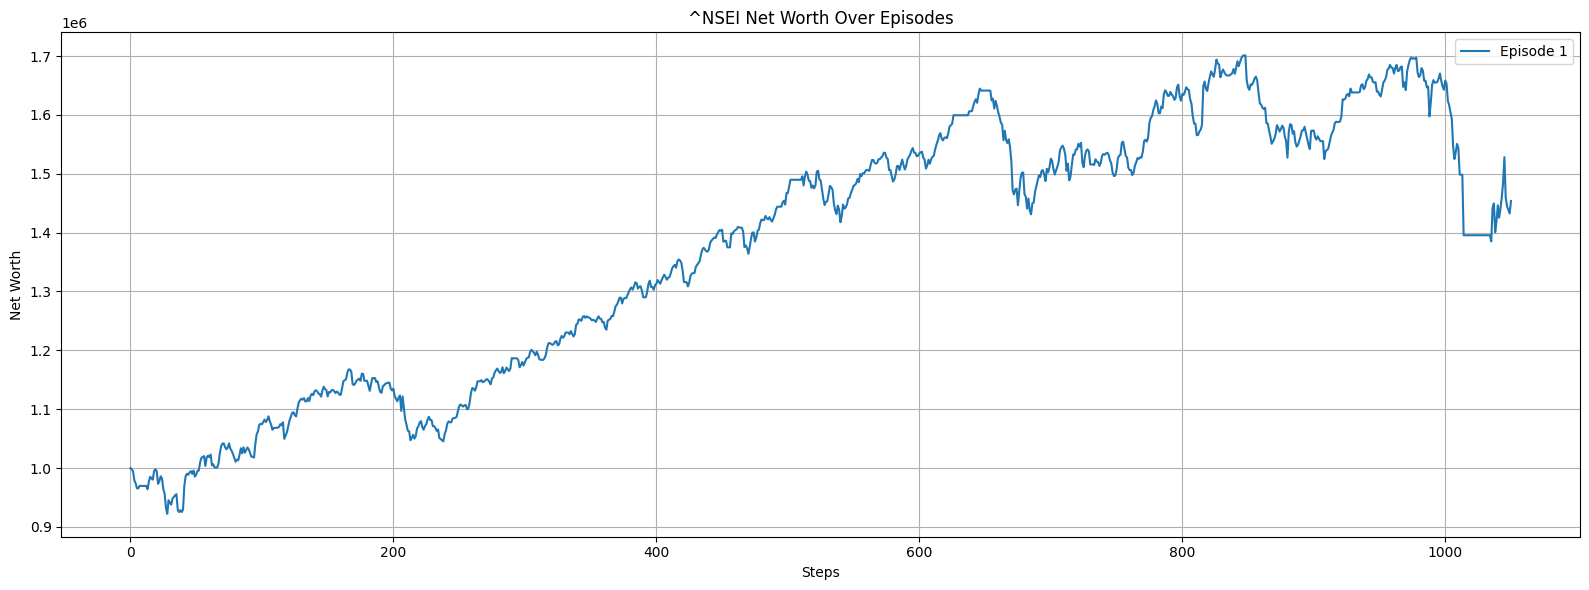

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

for i, episode_log in enumerate(net_worth_logs):
    plt.plot(range(len(episode_log)), episode_log, label=f'Episode {i+1}')

plt.title(f'{company_name} Net Worth Over Episodes')
plt.xlabel('Steps')
plt.ylabel('Net Worth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
x = np.mean(sharpe_ratio)
x

np.float64(0.6244754136589825)

In [72]:
y = np.mean(sorinto_ratio)
y

np.float64(0.6811218253165805)

In [73]:
z = np.mean(cumulative_returns)
z

np.float64(45.38407921288209)

In [74]:
p = np.mean(max_earning_rates)
p

np.float64(84.4932860842338)

In [75]:
q = np.mean(max_pullbacks)
q

np.float64(18.591445196809666)

In [76]:
r = np.mean(average_profitability_per_trade)
r

np.float64(431.818070531704)

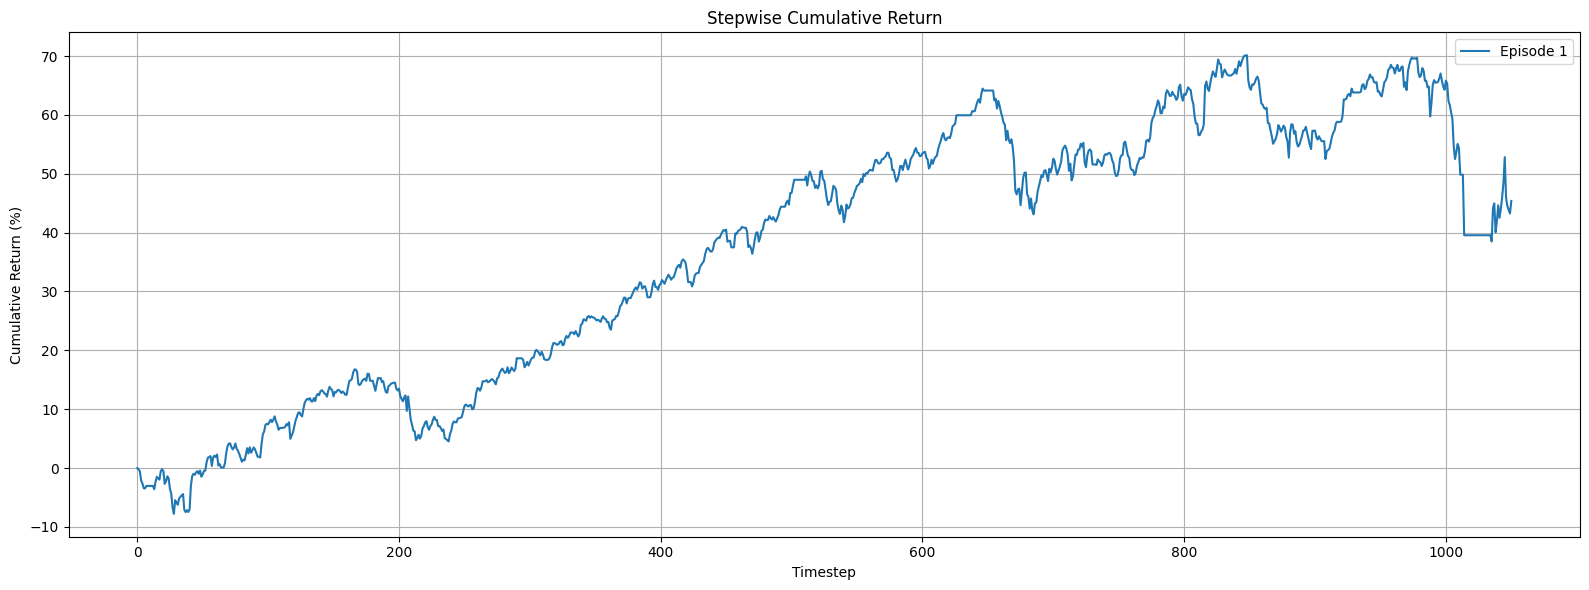

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

for i, returns in enumerate(cumulative_return_logs):
    plt.plot(returns, label=f"Episode {i+1}")

plt.title("Stepwise Cumulative Return")
plt.xlabel("Timestep")
plt.ylabel("Cumulative Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


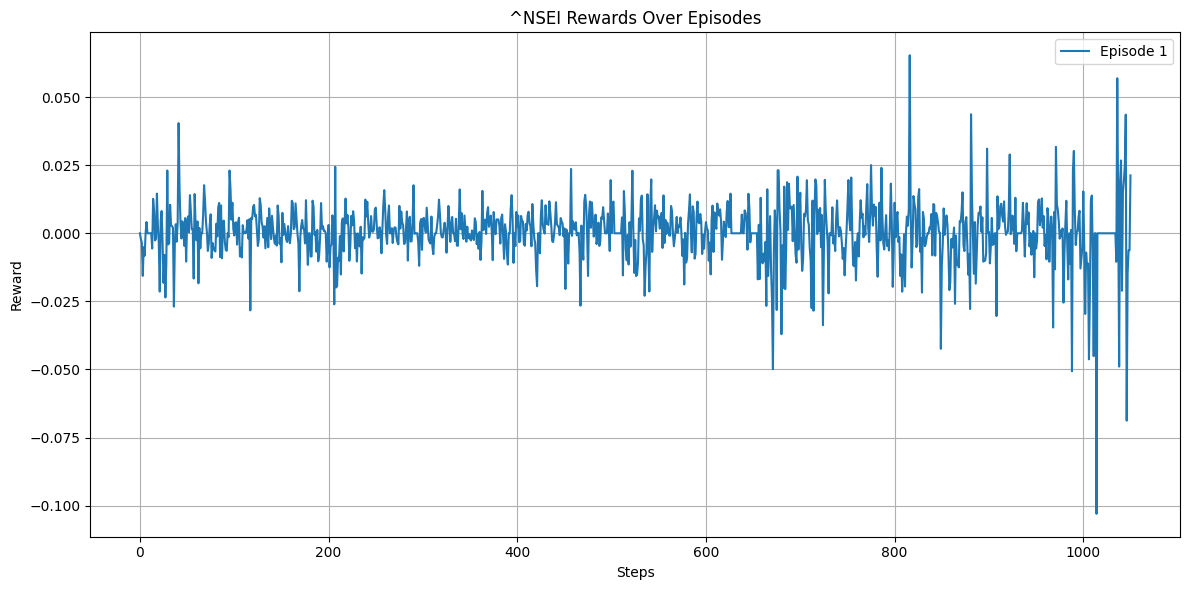

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i, episode_rewards in enumerate(rewards_list):
    plt.plot(range(len(episode_rewards)), episode_rewards, label=f'Episode {i+1}')

plt.title(f'{company_name} Rewards Over Episodes')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


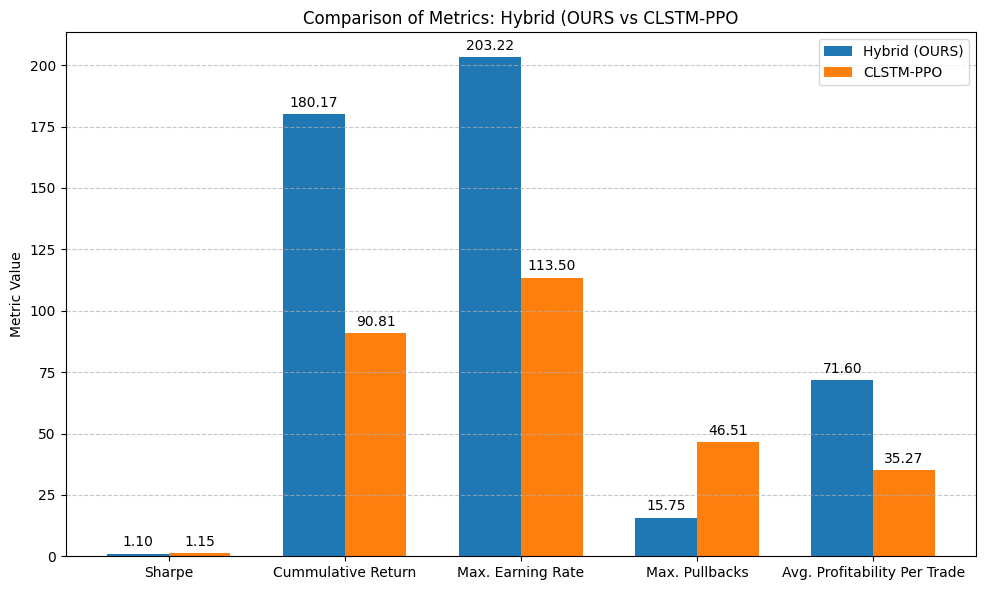

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Sharpe', 'Cummulative Return', 'Max. Earning Rate', 'Max. Pullbacks', 'Avg. Profitability Per Trade']
ours = [1.099, 180.17, 203.22, 15.75, 71.6]
clstm = [1.1540, 90.81, 113.50, 46.51, 35.27]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, ours, width, label='Hybrid (OURS)')
bars2 = ax.bar(x + width/2, clstm, width, label='CLSTM-PPO')

# Labels and titles
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Metrics: Hybrid (OURS vs CLSTM-PPO')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
